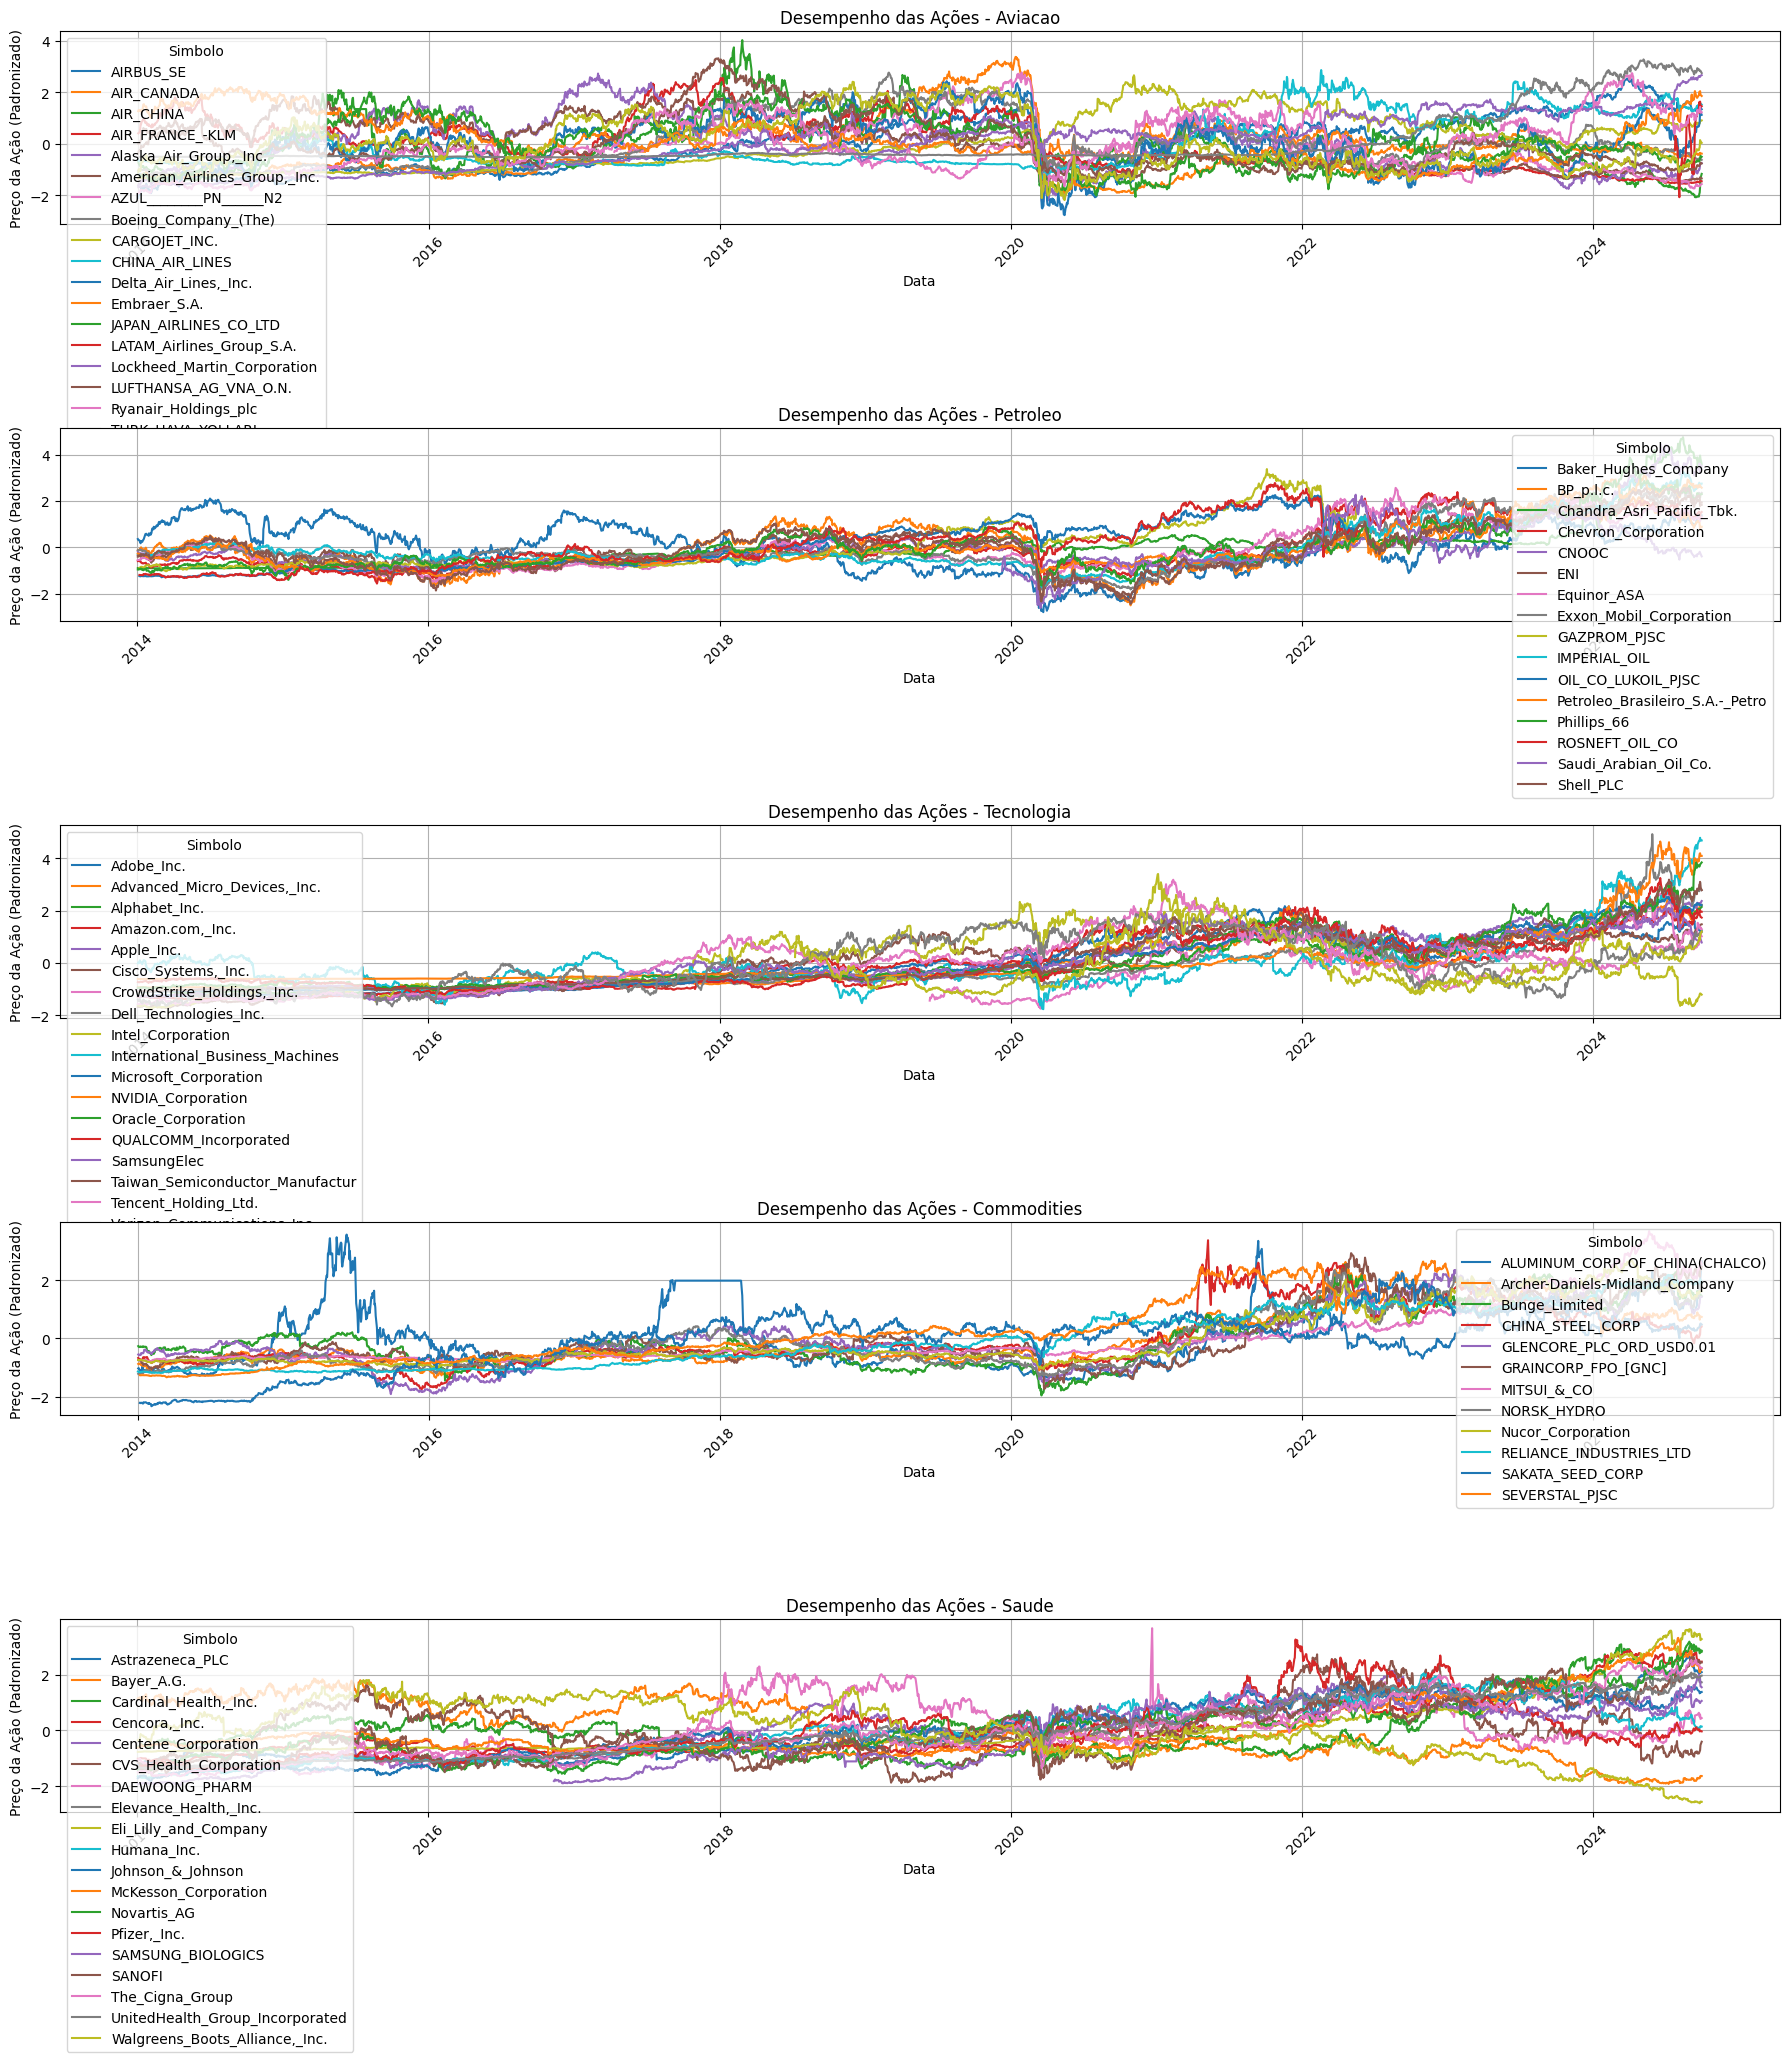

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_graficos_acoes():
    # Caminho do arquivo concatenado
    csv_file = r'C:\Projetos\Projeto5\Dados\concatenado2.csv'
    
    # Ler o CSV concatenado
    df = pd.read_csv(csv_file)
    
    # Converter a coluna 'Data' para o formato datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')

    # Listar os ramos de interesse
    ramos = ['Aviacao', 'Petroleo', 'Tecnologia', 'Commodities', 'Saude']  # Adicione mais ramos conforme necessário
    
    # Criar uma figura para os gráficos, com número de linhas igual ao número de ramos
    num_ramos = len(ramos)
    plt.figure(figsize=(18, 4 * num_ramos))  # Ajusta a altura com base no número de ramos

    # Loop através dos ramos e plotar os gráficos de linha
    for i, ramo in enumerate(ramos, 1):
        # Filtrar o DataFrame para o ramo atual
        df_ramo = df[df['Ramo'] == ramo]
        
        # Criar gráfico para o ramo atual
        plt.subplot(num_ramos, 1, i)  # Ajusta o número de subplots com base em num_ramos
        for simbolo in df_ramo['Simbolo'].unique():
            dados_empresa = df_ramo[df_ramo['Simbolo'] == simbolo]
            plt.plot(dados_empresa['Data'], dados_empresa['Ultimo_Padronizado'], label=simbolo)
        
        # Configurações do gráfico
        plt.title(f'Desempenho das Ações - {ramo}')
        plt.xlabel('Data')
        plt.ylabel('Preço da Ação (Padronizado)')
        plt.xticks(rotation=45)
        plt.legend(title='Simbolo')
        plt.grid()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Executar a função
plotar_graficos_acoes()


# Exibição gráfica da média dos valores

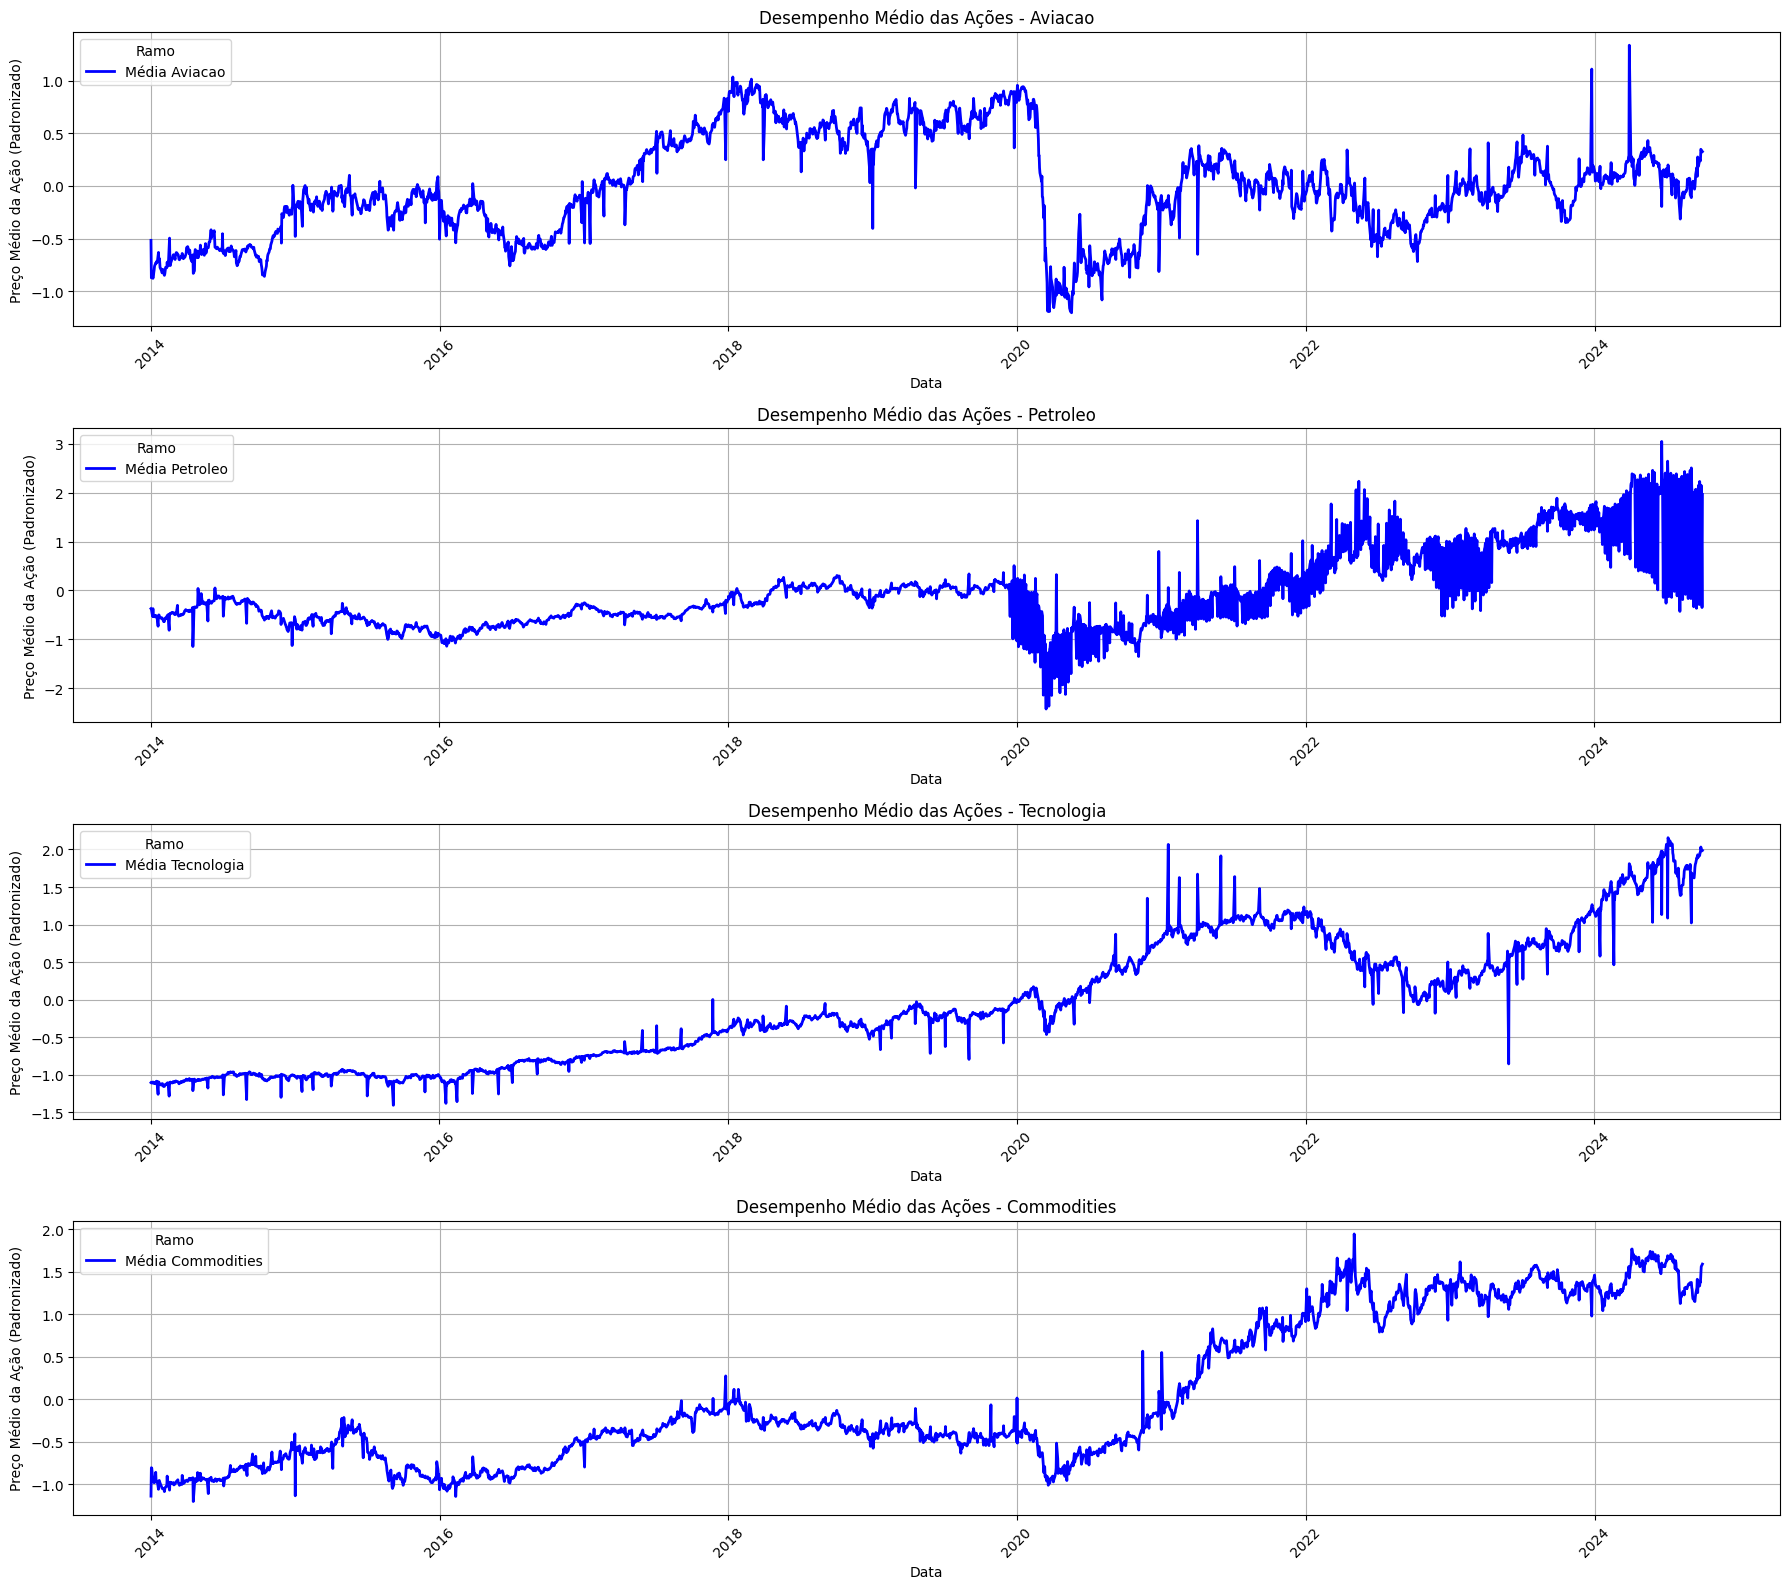

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_linha_media_ramos():
    # Caminho do arquivo concatenado
    csv_file = r'C:\Projetos\Projeto5\Dados\concatenado2.csv'
    
    # Ler o CSV concatenado
    df = pd.read_csv(csv_file)
    
    # Converter a coluna 'Data' para o formato datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')

    # Listar os ramos de interesse
    ramos = ['Aviacao', 'Petroleo', 'Tecnologia', 'Commodities']  # Adicione mais ramos conforme necessário
    
    # Criar uma figura para os gráficos, com número de linhas igual ao número de ramos
    num_ramos = len(ramos)
    plt.figure(figsize=(18, 4 * num_ramos))  # Ajusta a altura com base no número de ramos

    # Loop através dos ramos e plotar apenas a linha média
    for i, ramo in enumerate(ramos, 1):
        # Filtrar o DataFrame para o ramo atual
        df_ramo = df[df['Ramo'] == ramo]
        
        # Calcular a linha média do ramo
        df_media = df_ramo.groupby('Data')['Ultimo_Padronizado'].mean().reset_index()
        
        # Criar gráfico para a linha média do ramo
        plt.subplot(num_ramos, 1, i)
        plt.plot(df_media['Data'], df_media['Ultimo_Padronizado'], label=f'Média {ramo}', color='blue', linestyle='-', linewidth=2)

        # Configurações do gráfico
        plt.title(f'Desempenho Médio das Ações - {ramo}')
        plt.xlabel('Data')
        plt.ylabel('Preço Médio da Ação (Padronizado)')
        plt.xticks(rotation=45)
        plt.legend(title='Ramo')
        plt.grid()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Executar a função
plotar_linha_media_ramos()


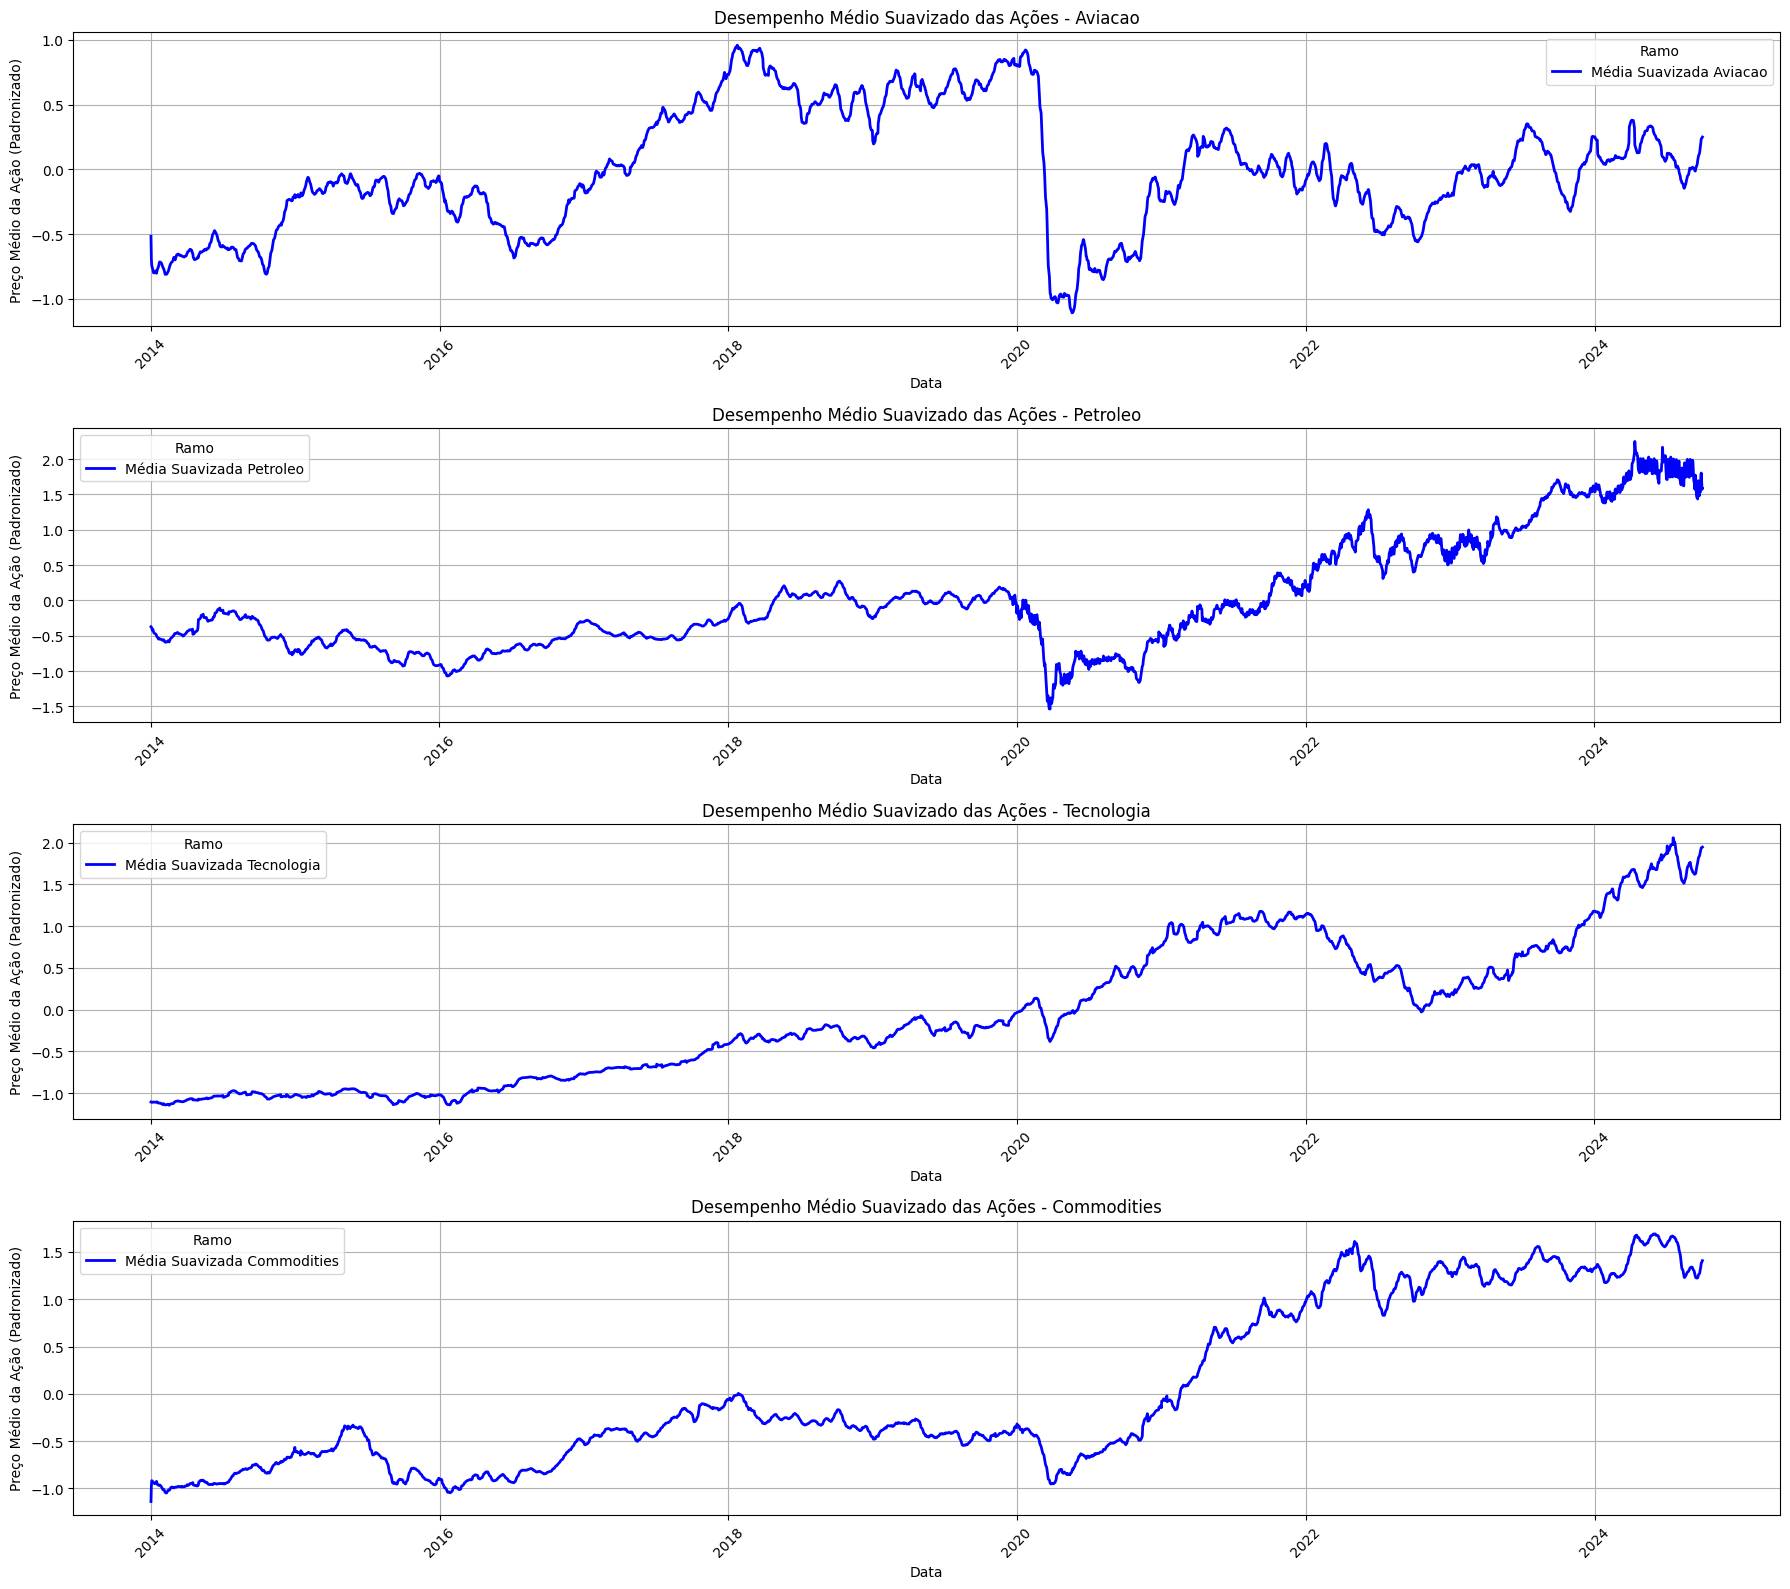

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def plotar_linha_media_ramos_com_suavizacao():
    # Caminho do arquivo concatenado
    csv_file = r'C:\Projetos\Projeto5\Dados\concatenado2.csv'
    
    # Ler o CSV concatenado
    df = pd.read_csv(csv_file)
    
    # Converter a coluna 'Data' para o formato datetime
    df['Data'] = pd.to_datetime(df['Data'], format='%d.%m.%Y')

    # Listar os ramos de interesse
    ramos = ['Aviacao', 'Petroleo', 'Tecnologia', 'Commodities']  # Adicione mais ramos conforme necessário
    
    # Criar uma figura para os gráficos, com número de linhas igual ao número de ramos
    num_ramos = len(ramos)
    plt.figure(figsize=(18, 4 * num_ramos))  # Ajusta a altura com base no número de ramos

    # Loop através dos ramos e plotar apenas a linha média suavizada
    for i, ramo in enumerate(ramos, 1):
        # Filtrar o DataFrame para o ramo atual
        df_ramo = df[df['Ramo'] == ramo]
        
        # Calcular a linha média do ramo
        df_media = df_ramo.groupby('Data')['Ultimo_Padronizado'].mean().reset_index()

        # Suavização usando média móvel (janela de 10 dias, por exemplo)
        df_media['Ultimo_Padronizado_Suavizado'] = df_media['Ultimo_Padronizado'].rolling(window=10, min_periods=1).mean()
        
        # Criar gráfico para a linha média suavizada do ramo
        plt.subplot(num_ramos, 1, i)
        plt.plot(df_media['Data'], df_media['Ultimo_Padronizado_Suavizado'], label=f'Média Suavizada {ramo}', color='blue', linestyle='-', linewidth=2)

        # Configurações do gráfico
        plt.title(f'Desempenho Médio Suavizado das Ações - {ramo}')
        plt.xlabel('Data')
        plt.ylabel('Preço Médio da Ação (Padronizado)')
        plt.xticks(rotation=45)
        plt.legend(title='Ramo')
        plt.grid()

    # Ajustar layout
    plt.tight_layout()
    plt.show()

# Executar a função
plotar_linha_media_ramos_com_suavizacao()
